In [7]:
!pip install -U scikit-learn > None # Restart environment after

In [15]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, roc_curve, roc_auc_score
from sklearn.datasets import load_diabetes, load_breast_cancer, make_classification, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.preprocessing import StandardScaler, LabelEncoder


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [16]:
path = 'https://raw.githubusercontent.com/leomag/music-prediction/main/dataset.csv'

In [17]:
data = pd.read_csv(path, index_col='Unnamed: 0')

In [18]:
df = data.copy().dropna()

In [19]:
cat_cols = df.select_dtypes(include='object')


In [20]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,62845,10357,8100,11741,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,55667,3287,14796,22528,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,77941,14839,8580,9580,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,68241,5255,16899,25689,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='track_genre'),
    df['track_genre'],
    random_state=2023,
    test_size=0.3
)
X_train.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
20911,9130,28517,5698,67208,72,185194,False,0.628,0.737,7,-4.437,1,0.0410,0.0625,0.000000,0.0777,0.5920,91.507,4
46954,66339,27520,6518,9132,16,137919,False,0.687,0.904,6,-4.208,1,0.4540,0.1180,0.000848,0.6460,0.0378,155.059,4
97965,23671,10344,9374,2612,43,200746,False,0.804,0.784,7,-5.458,1,0.0677,0.2500,0.000000,0.0466,0.9750,152.020,4
102199,75230,1883,42047,3837,0,240146,False,0.523,0.322,0,-8.957,1,0.0285,0.5350,0.000000,0.1320,0.3000,126.002,4
104651,4701,23575,36416,35211,40,229213,False,0.601,0.198,1,-9.794,1,0.0280,0.8630,0.000367,0.1070,0.2010,103.800,4


In [22]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

In [23]:
logreg = LogisticRegression(multi_class="ovr")
logreg.fit(X_train_scaled, y_train)
y_preds_logreg = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds_logreg))

              precision    recall  f1-score   support

           0       0.12      0.13      0.12       269
           1       0.16      0.11      0.13       308
           2       0.02      0.00      0.01       308
           3       0.06      0.02      0.03       313
           4       0.23      0.34      0.27       295
           5       0.05      0.03      0.03       314
           6       0.35      0.40      0.37       307
           7       0.23      0.26      0.24       277
           8       0.00      0.00      0.00       293
           9       0.03      0.00      0.01       343
          10       0.23      0.15      0.18       289
          11       0.12      0.01      0.01       300
          12       0.31      0.67      0.42       303
          13       0.25      0.31      0.28       302
          14       0.25      0.36      0.29       289
          15       0.15      0.14      0.14       294
          16       0.46      0.48      0.47       312
          17       0.18    

In [24]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_preds_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_preds_dtc))

              precision    recall  f1-score   support

           0       0.11      0.12      0.11       269
           1       0.19      0.18      0.18       308
           2       0.01      0.02      0.01       308
           3       0.07      0.09      0.08       313
           4       0.21      0.22      0.21       295
           5       0.11      0.13      0.12       314
           6       0.43      0.42      0.43       307
           7       0.32      0.32      0.32       277
           8       0.05      0.07      0.06       293
           9       0.08      0.10      0.09       343
          10       0.33      0.37      0.35       289
          11       0.09      0.08      0.09       300
          12       0.56      0.58      0.57       303
          13       0.42      0.44      0.43       302
          14       0.33      0.28      0.30       289
          15       0.12      0.14      0.13       294
          16       0.49      0.53      0.51       312
          17       0.17    

In [25]:
def plot_roc_auc(fpr, tpr, thresholds, title):
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='DecisionTreeClassifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()

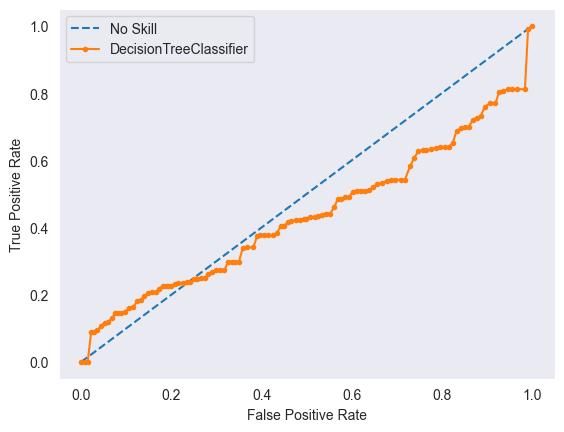

In [26]:
# y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_preds_dtc, pos_label=1)
plot_roc_auc(fpr, tpr, thresholds, title='Decision Tree Classifier')

In [27]:
lcv = LogisticRegressionCV()
lcv.fit(X_train_scaled, y_train)
y_preds_logreg_cv = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_preds_logreg_cv))

              precision    recall  f1-score   support

           0       0.12      0.13      0.12       269
           1       0.16      0.11      0.13       308
           2       0.02      0.00      0.01       308
           3       0.06      0.02      0.03       313
           4       0.23      0.34      0.27       295
           5       0.05      0.03      0.03       314
           6       0.35      0.40      0.37       307
           7       0.23      0.26      0.24       277
           8       0.00      0.00      0.00       293
           9       0.03      0.00      0.01       343
          10       0.23      0.15      0.18       289
          11       0.12      0.01      0.01       300
          12       0.31      0.67      0.42       303
          13       0.25      0.31      0.28       302
          14       0.25      0.36      0.29       289
          15       0.15      0.14      0.14       294
          16       0.46      0.48      0.47       312
          17       0.18    

In [ ]:
# clff = OneVsRestClassifier(SVC()).fit(X_train, y_train)
# y_preds = clff.predict(X_test)
# print(classification_report(y_test, y_preds))

Самая высокая точность вышла у DecisionTreeClassifier 0.24 (f1), но это маловато, если смотреть на график пока позитива мало, всё потому что здесь задача мультиклассовой классификации, то есть трек, может иметь несколько жанров, поэтому есть смысл посмотреть в будущем бустинг или OneVsRestClassifier глубже, здесь я его пытался запустить, но он не справился и часа за два, потому что SVC производит очень много вычислений. Хотя логистическая регрессия многоклассовая внутри себе и есть OneVsRestClassifier, но хотелось всё же увидеть что будет если использовать именно отдельно OneVsRestClassifier.